# The Verlet and Velocity Verlet methods

## 0. Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Original Verlet

For differential equations like:
$$
\frac{d^2x}{dt^2} = \textbf{F}(x(t))
$$ <br>
Verlet algorithm is given by the followings:
$$
x_{n+1} = 2x_n - x_{n-1} + h^2 \textbf{F}(x_n) \:\:\:\: \star
$$ <br>
$$
v_n = \frac{x_{n+1}-x_{n-1}}{2h} \:\:\:\: \star\star.
$$

**Only positions enter in the original Verlet. The expresion for velocities is an estimation!**<br>
To directly use the velocities, Verlet algorithm has been modified to another algorithm so-called Velocity-Verlet.

###  Implementing the original Verlet

In [2]:
'''Parameters'''
k = 1
m = 1
'''Defining RHS function in our ODE'''
def F(x):
    return -(k/m)*x
'''Start and End point with number of intervals and defining lenght between each interval'''
t_0 = 0
t_f = 20
N = 1000
h = (t_f - t_0)/N

'''Allocating memory to store solutions'''
X = np.empty(N)
V = np.empty(N)

'''Initial conditions'''
X[0] = 1
V[0] = 0

The Verlet algorithm **is NOT self-starting**! As it is shown in the ($\star$) equation, we need two previous positions. In order to overcome this issue we can implement Euler-Cromer for one step to have $ x_0$ and $x_1$.

In [3]:
for i in range(N-1):
    '''For start we need to use Euler-Cromer, which is under codition i==0'''
    if i == 0:
        V[i+1] = V[i] + F(X[i])*h
        X[i+1] = X[i] + V[i+1]*h
    else:
        '''Implementing original Verlet'''
        X[i+1] = 2*X[i] - X[i-1] + F(X[i])*h**2
        V[i] = (X[i+1]-X[i-1])/(2*h)

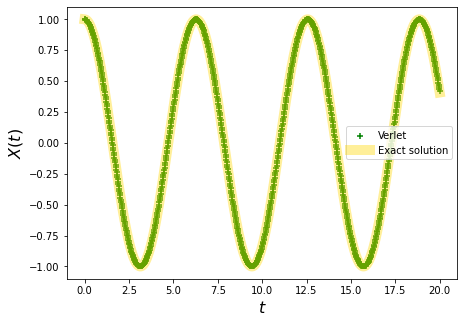

In [4]:
t = np.linspace(t_0,t_f,N)

fig1, ax1 = plt.subplots(1,1,figsize=(7,5))
ax1.scatter(t,X,label="Verlet", color='g', marker='+')
ax1.plot(t,np.cos(np.sqrt(k/m)*t), color='gold', lw=10, alpha= 0.4, label="Exact solution")
ax1.set_xlabel("$t$",fontsize=16)
ax1.set_ylabel("$X(t)$",fontsize=16)
ax1.legend()

## 2. Velocity-Verlet

In this method the positions and velocities are given by:
$$
x_{n+1} = x_n + h v_n + \frac{h^2}{2} \textbf{F}(x_n)
$$<br>
$$
v_{n+1} = v_n + \frac{h}{2}(\textbf{F}(x_{n+1}) + \textbf{F}(x_n))
$$<br>

Lets test these two algorithm with a harmonic oscillator equation, i.e.,
$$
\frac{d^2x}{dt^2} = - \frac{k}{m} x
$$

###  Implementing the Velocity Verlet
This method is self-starting and need not any additional method to determine a few starting steps.

In [5]:
k = 1
m = 1
def F(x):
    return -(k/m)*x

t_0 = 0
t_f = 20
N = 1000
h = (t_f - t_0)/N

x = np.empty(N)
v = np.empty(N)

# Initial conditions
x[0] = 1
v[0] = 0

for i in range(N-1):
    x[i+1] = x[i] + h*v[i] + F(x[i])*(h**2)/2
    v[i+1] = v[i] + (F(x[i+1]) + F(x[i]))*(h/2)

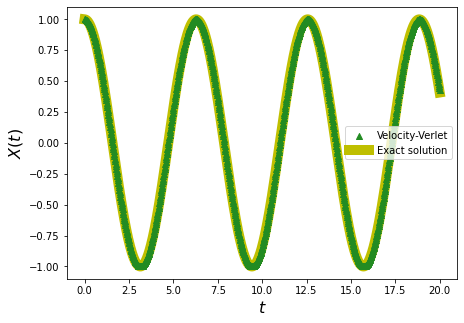

In [6]:
t = np.linspace(t_0,t_f,N)

fig2, ax2 = plt.subplots(1,1,figsize=(7,5))
ax2.scatter(t,x,label="Velocity-Verlet", color='forestgreen', marker="^", zorder=2)
ax2.plot(t,np.cos(np.sqrt(k/m)*t), color='y', lw=10, label="Exact solution", zorder=1)
ax2.set_xlabel("$t$",fontsize=16)
ax2.set_ylabel("$X(t)$",fontsize=16)
ax2.legend()

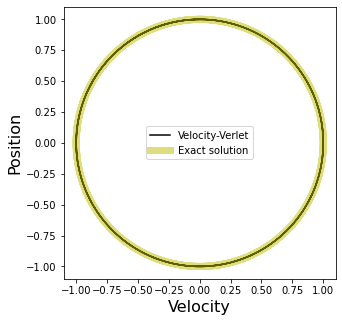

In [7]:
fig3, ax3 = plt.subplots(1,1,figsize=(5,5))
ax3.plot(v,x,label="Velocity-Verlet", color='k')
ax3.plot(-np.sqrt(k/m)*np.sin(np.sqrt(k/m)*t),np.cos(np.sqrt(k/m)*t), color='y', lw=7, alpha=0.5, label="Exact solution")
ax3.set_aspect('equal')
ax3.set_xlabel("Velocity",fontsize=16)
ax3.set_ylabel("Position",fontsize=16)
ax3.legend()